## Using Tensorflow

In [1]:
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
train_df = pd.read_csv('landmark_train.csv')
test_df = pd.read_csv('landmark_test.csv')

In [3]:
# train_csv = tf.keras.utils.get_file('landmark_train.csv', 'https://raw.githubusercontent.com/jordiyapz/dummy-dataset-container/main/landmark_ds/landmark_train.csv')
# val_csv = tf.keras.utils.get_file('landmark_val.csv', 'https://raw.githubusercontent.com/jordiyapz/dummy-dataset-container/main/landmark_ds/landmark_val.csv')
# test_csv = tf.keras.utils.get_file('landmark_test.csv', 'https://raw.githubusercontent.com/jordiyapz/dummy-dataset-container/main/landmark_ds/landmark_test.csv')
# csv_file = tf.keras.utils.get_file('landmark_ds.csv', 'https://raw.githubusercontent.com/jordiyapz/dummy-dataset-container/main/landmark_ds/Landmark%20Dataset.csv')

In [4]:
# val_df = pd.read_csv(val_csv)
# train_df = pd.read_csv(train_csv)
# train_df = pd.concat((train_df, val_df)).sample(frac=1.).reset_index(drop=True)

# test_df = pd.read_csv(test_csv).sample(frac=1.).reset_index(drop=True)
# train_df

In [5]:
def get_landmark_features(df):
  landmark_feature_names = df.iloc[:2, 2:-1].columns
  landmark_features = df[landmark_feature_names]
  # landmark_feature_tensors = tf.convert_to_tensor(landmark_features)
  return landmark_features

In [6]:
landmark_features = get_landmark_features(train_df) 
targets = train_df.IS_Y.values

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(landmark_features)

In [7]:
def f1_score(precision, recall):
    return 2 * precision * recall / (precision + recall)

In [8]:
from tensorflow.keras.metrics import Precision, Recall

model = tf.keras.Sequential([
  normalizer,
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=[Precision(), Recall()])

In [9]:
history = model.fit(landmark_features, targets, epochs=20, batch_size=32, validation_split=.2)

Epoch 1/20
137/137 [==============================] - 1s 3ms/step - loss: 0.4928 - precision: 0.0476 - recall: 0.0010 - val_loss: 0.3972 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
137/137 [==============================] - 0s 1ms/step - loss: 0.3095 - precision: 0.9821 - recall: 0.0572 - val_loss: 0.2612 - val_precision: 0.9357 - val_recall: 0.5304
Epoch 3/20
137/137 [==============================] - 0s 1ms/step - loss: 0.1952 - precision: 0.9191 - recall: 0.7919 - val_loss: 0.1607 - val_precision: 0.8696 - val_recall: 0.8907
Epoch 4/20
137/137 [==============================] - 0s 1ms/step - loss: 0.1234 - precision: 0.9123 - recall: 0.9095 - val_loss: 0.1171 - val_precision: 0.9020 - val_recall: 0.8947
Epoch 5/20
137/137 [==============================] - 0s 1ms/step - loss: 0.0867 - precision: 0.9406 - recall: 0.9230 - val_loss: 0.0907 - val_precision: 0.8835 - val_recall: 0.9514
Epoch 6/20
137/137 [==============================] - 0s 1ms/step - loss: 0.0651 -

C:\Users\jordi\AppData\Local\Temp/ipykernel_11656/3829437676.py:2: RuntimeWarning: invalid value encountered in true_divide
  return 2 * precision * recall / (precision + recall)


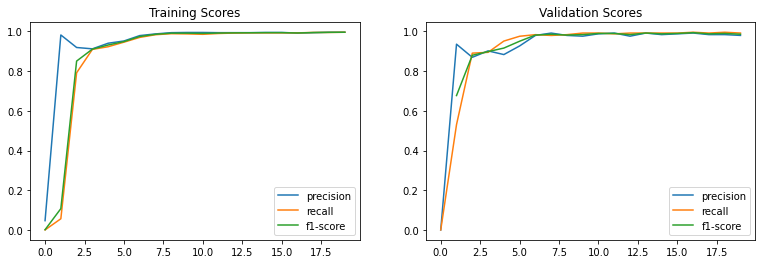

In [10]:
precision = np.array(history.history['precision'])
recall = np.array(history.history['recall'])
val_precision = np.array(history.history['val_precision'])
val_recall = np.array(history.history['val_recall'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13, 4))
ax1.plot(precision)
ax1.plot(recall)
ax1.plot(f1_score(precision, recall))
ax1.legend(['precision', 'recall', 'f1-score'])
ax1.set_title("Training Scores")

ax2.plot(val_precision)
ax2.plot(val_recall)
ax2.plot(f1_score(val_precision, val_recall))
ax2.legend(['precision', 'recall', 'f1-score'])
ax2.set_title("Validation Scores")

plt.show()

In [11]:
test_loss, test_precision, test_recall = model.evaluate(get_landmark_features(test_df), test_df.IS_Y.values, verbose=2)
test_loss, test_precision, test_recall, f1_score(test_precision, test_recall)

43/43 - 0s - loss: 0.0805 - precision: 0.9970 - recall: 0.9853 - 29ms/epoch - 674us/step


(0.08046633750200272,
 0.997032642364502,
 0.9853372573852539,
 0.9911504502515155)

In [12]:
model.save('landmark-classifier')

INFO:tensorflow:Assets written to: landmark-classifier\assets


In [13]:
# !zip -r landmark_classifier.zip landmark-classifier/